# 4.10 - Final Report (Task 5-9)

# List of Content
## 1. Import data
## 2. Create a customer profiling variable
### 2.1 Criteria for classification
### 2.2 Create a profile flag in the dataframe
### 2.3 Distribution of customer profiles
### 2.4 Usage frequency and expenditure of the customer profiles
## 3. Compare customer profiles with regions and departments
### 3.1 Compare with regions
### 3.2 Compare with departments(This part is in another notebook)
## 4. Export data

## 1 - Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## 2. Import 'subset_customers_norm_activity' dataset

In [3]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\09-10-2023 Instacart Basket Analysis"

In [5]:
# Import dataset
df_active_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'subset_customers_normal_activity.pkl'))

In [6]:
# Function to display all columns
pd.set_option('display.max_columns', None)

In [7]:
# Check output
df_active_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_order,spending_flag,median_order,customer_flag,gender,state,age,date_joined,num_of_dependants,marital_status,income,regions,user_activity_flag
0,2539329,1,1,2,8,11.0,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity


In [8]:
# Check dimensions
df_active_customers.shape

(30964564, 28)

## Importing the Departments wrangled data

In [7]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

# 2. Create a customer profiling variable

## 2.1 Criteria for classification

In [9]:
# Delete it later
# Changing the datatype of age to int64
df_active_customers['age'] = df_active_customers['age'].astype(str).astype(np.int64)

In [10]:
# Check the 'age' and 'fam_status' columns for general stats

df_active_customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [11]:
df_active_customers['marital_status'].value_counts()

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [12]:
df_active_customers[df_active_customers['marital_status'] == 'divorced/widowed']['age'].value_counts().sort_index()

age
60    112170
61    128659
62    118630
63    130008
64    133846
65    116237
66    106999
67    124435
68    119330
69    114152
70    117019
71    120106
72    115203
73    126635
74    115007
75    123138
76    111590
77    114146
78    122861
79    119056
80    117837
81    138207
Name: count, dtype: int64

In [13]:
df_active_customers[df_active_customers['marital_status'] == 'living with parents and siblings']['age'].value_counts().sort_index()

age
18    359202
19    390496
20    360065
21    371409
Name: count, dtype: int64

In [14]:
df_active_customers[df_active_customers['marital_status'] == 'married']['age'].value_counts().sort_index()

age
22    362016
23    371116
24    375380
25    321607
26    373990
27    357090
28    359683
29    367931
30    360883
31    375990
32    361520
33    349388
34    360971
35    382378
36    345859
37    374181
38    368337
39    355043
40    363639
41    331109
42    366756
43    372047
44    374471
45    368873
46    345891
47    379897
48    389285
49    377477
50    363441
51    371709
52    354864
53    356055
54    380525
55    361260
56    383471
57    351295
58    347206
59    351844
60    349727
61    334956
62    355229
63    344749
64    370986
65    348473
66    347605
67    348098
68    381989
69    375343
70    363215
71    343409
72    364681
73    372818
74    362161
75    376091
76    365758
77    363853
78    348258
79    389281
80    374913
81    347640
Name: count, dtype: int64

In [15]:
df_active_customers[df_active_customers['marital_status'] == 'single']['age'].value_counts().sort_index()

age
18    119255
19    105581
20    120129
21    117707
22    128795
23    121815
24    112228
25    127717
26    115902
27    143981
28    105148
29    129360
30    125754
31    130228
32    113156
33    122943
34    123859
35    114132
36    114790
37    113437
38    124453
39    130205
40    119684
41    120160
42    118325
43    127682
44    119986
45    119215
46    126680
47    114155
48    117445
49    130402
50    105335
51    120509
52    125565
53    122949
54    117292
55    128473
56    116109
57    122362
58    132636
59    128871
Name: count, dtype: int64

##### I use the following classification for customer types based on age and family status: Young single (or living with parents and siblings)/married adult (age 18-39), Middle-aged single/married adult (40-59), Older single (or divorced/widowed)/married adult (60+)

##### Notes:
##### - The stats above show that only young adults appear in the category "living with parents and siblings" and only older adults in "divorced/widowed". These customers are thus integrated into their respective singles' category.


## 2.2 Create a profile flag in the dataframe

In [16]:
df = df_active_customers

In [17]:
# Create a "age_fam_profile" column based on the criteria above

df.loc[(df['age'] <= 39) & (df['marital_status'] == 'single') | (df['marital_status'] == 'living with parents and siblings'), 'age_fam_profile'] = 'Young single adult'

In [18]:
df.loc[(df['age'] <= 39) & (df['marital_status'] == 'married'), 'age_fam_profile'] = 'Young married adult'

In [19]:
df.loc[(df['age'] >= 40) & (df['age'] <= 59) & (df['marital_status'] == 'single'), 'age_fam_profile'] = 'Middle-aged single adult'

In [20]:
df.loc[(df['age'] >= 40) & (df['age'] <= 59) & (df['marital_status'] == 'married'), 'age_fam_profile'] = 'Middle-aged married adult'

In [21]:
df.loc[(df['age'] >= 60) & (df['marital_status'] == 'single') | (df['marital_status'] == 'divorced/widowed'), 'age_fam_profile'] = 'Older single adult'

In [22]:
df.loc[(df['age'] >= 60) & (df['marital_status'] == 'married'), 'age_fam_profile'] = 'Older married adult'

In [23]:
# Frequency check on the new column

df['age_fam_profile'].value_counts().sort_index()

age_fam_profile
Middle-aged married adult    7291115
Middle-aged single adult     2433835
Older married adult          7929233
Older single adult           2645271
Young married adult          6523363
Young single adult           4141747
Name: count, dtype: int64

In [24]:
# Check non-NaN values

df['age_fam_profile'].count()

30964564

## 2.3 Distribution of customer profiles

In [25]:
# Define the desired order of the age-family profiles

desired_order = ['Young single adult', 'Young married adult', 'Middle-aged single adult', 
                 'Middle-aged married adult', 'Older single adult', 'Older married adult']

In [26]:
# Frequency check on the age-family profiles

df['age_fam_profile'].value_counts()[desired_order]

age_fam_profile
Young single adult           4141747
Young married adult          6523363
Middle-aged single adult     2433835
Middle-aged married adult    7291115
Older single adult           2645271
Older married adult          7929233
Name: count, dtype: int64

Text(0.5, 0, 'Count in million')

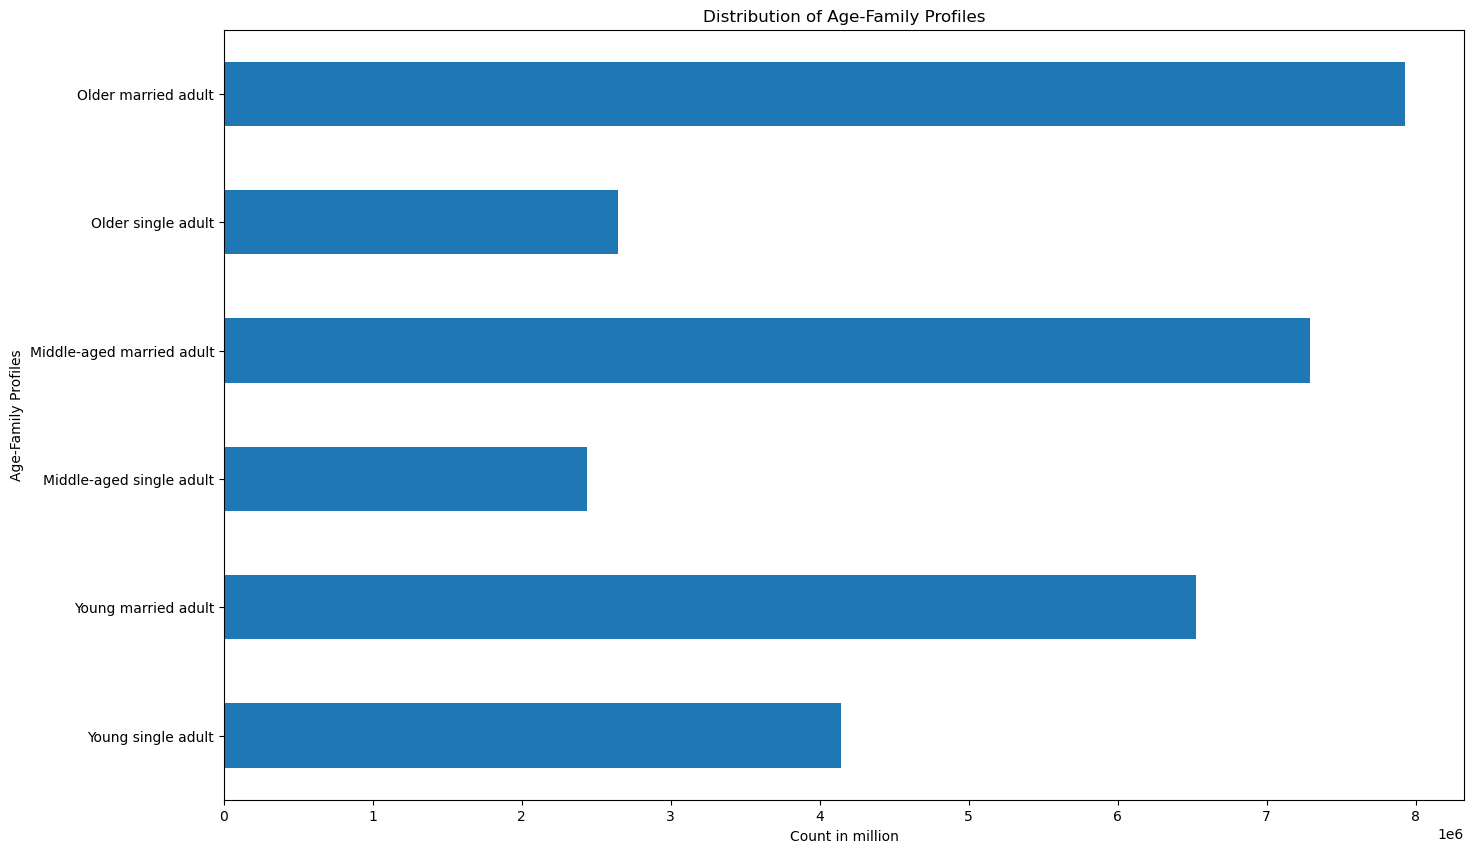

In [27]:
# Create a horizontal bar chart

bar_profile_distr = df['age_fam_profile'].value_counts()[desired_order].plot.barh(figsize=(16, 10))
plt.title('Distribution of Age-Family Profiles')
plt.ylabel('Age-Family Profiles')
plt.xlabel('Count in million')

##### The distribution reflects the total number of purchased items by the age-family profiles. It shows that married people buy more items than single people.

In [29]:
# Export chart

bar_profile_distr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_distribution1.png'))

## 2.4 Usage frequency and expenditure of the customer profiles

In [30]:
# Mean, min, and max of the total order numbers and item prices

df.groupby('age_fam_profile').agg({'max_order': ['mean', 'min', 'max'], 'prices': ['min', 'mean', 'max']}).loc[desired_order]

max_order         prices                    
                                mean min max    min       mean      max
age_fam_profile                                                        
Young single adult         34.505344   5  99    1.0  11.547791  99999.0
Young married adult        34.502705   5  99    1.0  12.378119  99999.0
Middle-aged single adult   35.035972   5  99    1.0  12.928428  99999.0
Middle-aged married adult  34.209082   5  99    1.0  11.725969  99999.0
Older single adult         34.710676   5  99    1.0  11.532741  99999.0
Older married adult        34.237494   5  99    1.0  11.788405  99999.0

##### The customer profiles behave quite similar when it comes to total order number of each customer and item price purchased by them.

In [31]:
# Total expenditure by the customer profiles

df.groupby('age_fam_profile').agg({'prices': 'sum'}).loc[desired_order]

,prices
age_fam_profile,
Young single adult,47828030.6
Young married adult,80746963.1
Middle-aged single adult,31465661.7
Middle-aged married adult,85495388.4
Older single adult,30507224.5
Older married adult,93473013.3


##### Married people spend more money in total than single people which is the same finding above that married people purchase more items than the single people.

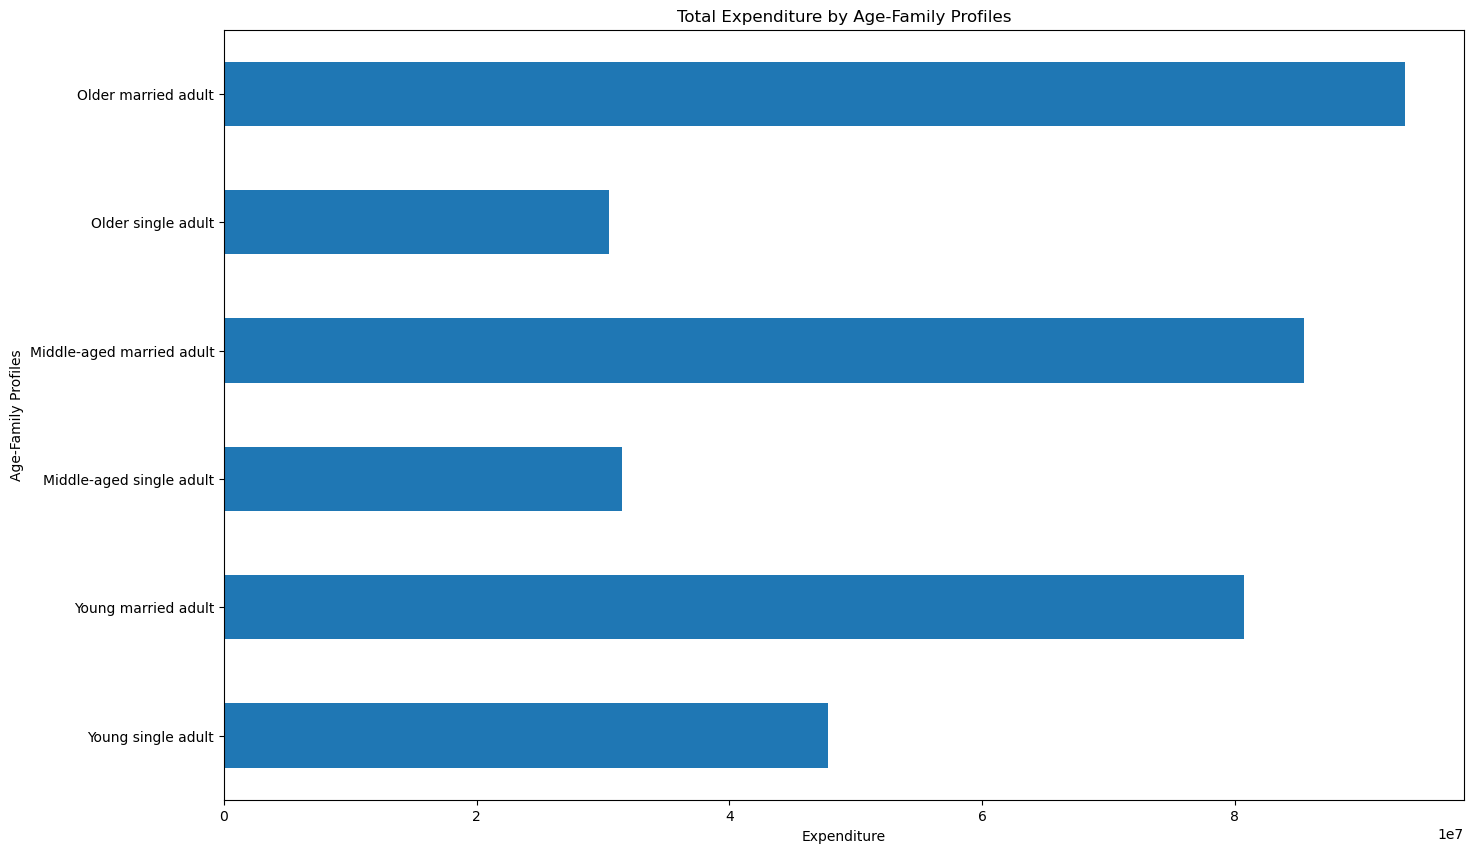

In [32]:
# Create a horizontal bar chart

bar_expend_profile = df.groupby('age_fam_profile').agg({'prices': 'sum'}).loc[desired_order].plot.barh(figsize=(16, 10))
plt.title('Total Expenditure by Age-Family Profiles')
plt.ylabel('Age-Family Profiles')
plt.xlabel('Expenditure')
plt.legend().remove()

In [33]:
# Export chart

bar_expend_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_profile1.png'))

# 3. Compare customer profiles with regions and departments

In [34]:
# Crosstab customer profile with region

crosstab_profile_region = pd.crosstab(df['age_fam_profile'], df['regions'], dropna = False).loc[desired_order]

In [35]:
crosstab_profile_region

regions,Midwest,Northeast,South,West
age_fam_profile,,,,
Young single adult,967198,726591,1817369,630589
Young married adult,1515803,1145146,2824168,1038246
Middle-aged single adult,589855,405554,1043117,395309
Middle-aged married adult,1733214,1303165,3103307,1151429
Older single adult,617198,478767,1133003,416303
Older married adult,1838245,1405462,3460309,1225217


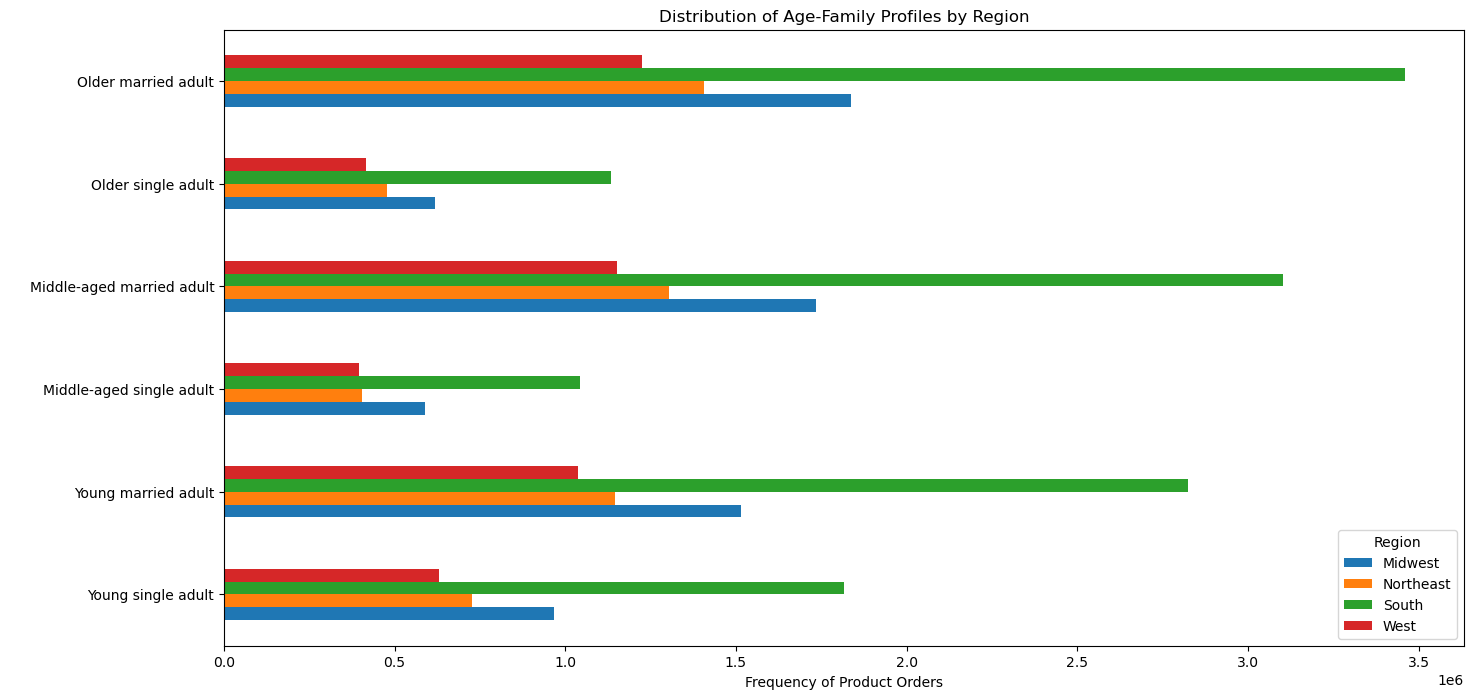

In [36]:
# Create a stacked bar chart

bar_profile_region = crosstab_profile_region.plot.barh(figsize=(16, 8))

plt.title('Distribution of Age-Family Profiles by Region')
plt.ylabel(' ')
plt.xlabel('Frequency of Product Orders')
plt.legend(title='Region', loc='lower right')

##### Married people purchase more than single people across all four regions.

In [37]:
# Export chart

bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_region1.png'))

## 3.2 Compare with departments

In [44]:
# Check the dataframe with the department names

#df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# 4. Export data

In [38]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_active_5_9.pkl'))